분석하고 싶은 연도를 입력하세요2022
('금융', 307)
('금리', 267)
('대출', 234)
('채권', 182)
('시장', 171)
('국고', 127)
('하락', 121)
('금감원', 112)
('증권', 112)
('투자', 111)
('거래', 96)
('인상', 96)
('한국', 92)
('기준', 90)
('은행', 90)
('상황', 85)
('정부', 84)
('포인트', 83)
('지원', 82)
('상승', 82)
D:\Python\Jupyter


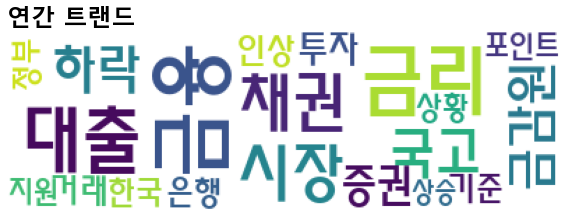

In [1]:
import os
import time
import datetime
from konlpy.tag import Kkma,Okt
from konlpy.utils import pprint
from collections import Counter
from wordcloud import WordCloud


current_path = os.getcwd()+"/data"

dirlist=os.listdir(current_path)
year=input('분석하고 싶은 연도를 입력하세요')
data= ''
for i in range(1,13):
    if i <10:
        cnt= '0'+str(i)
    else :
        cnt=str(i)

    f=open(current_path+"/"+"경제"+year+cnt+".txt","r")
    data+= f.read()
    f.close()
    

    
#Okt 객체 생성
okt = Okt()
noun= okt. nouns(data)

pop_list=["연합뉴스","통해","위해","크게","여기","최근","내년","수준","현재","이번","대한","분야","재배포","전재","무단","금지","제공","배포"]
noun = [word for word in noun if len(word) >= 2 and word not in pop_list]
count= Counter(noun)

#명사 빈도 카운트 가장 많이 나온 단어 20개
noun_list= count.most_common(20)
for v in noun_list :
    print(v)

#현재 작업 디렉토리
current_path = os.getcwd()
print(current_path)
#변경 디렉토리
os.chdir('C:/Users/big1-01/Desktop/project/renewkdi2/renewKDI/src/main/resources/static/images/bigdata')

#글꼴설정    
path = 'C:\windows\fonts\HMFMMUEX.TTC' 

wc = WordCloud(font_path=path, background_color="white" 
               ,width = 400, height=130, random_state = 20
               ,max_font_size=60)
cloud = wc.generate_from_frequencies(dict(noun_list))

cloud.to_file('경제연간트랜드.png') #이미지로 저장

title_font = {
    'fontsize': 24,
    'fontweight': 'bold'
}

#화면에 그래프로 출력
import matplotlib.pyplot as plt 
plt.rc('font', family='Malgun Gothic')
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(cloud)
plt.title("연간 트랜드",fontdict=title_font, loc='left')
plt.savefig('경제연간트랜드.png', bbox_inches='tight')
plt.show()
